[-0.98823346  0.00752687] [ 1.97645719e+00 -2.29295332e-04]
[-0.98823361 -0.00747337] [1.97645749e+00 2.25985938e-04]
[-0.98823376  0.00730217] [ 1.97645779e+00 -2.18923681e-04]
[-0.98823391 -0.00700449] [1.97645809e+00 2.07913251e-04]
[-0.99999995 -0.00347797] [9.99999950e-01 1.38408335e-04]
[-0.99999995  0.0041927 ] [ 9.99999950e-01 -1.21458378e-04]
[-0.99999995 -0.00255133] [9.99999950e-01 3.89090759e-05]
[-9.99999950e-01 -3.78619233e-04] [9.99999950e-01 5.92916853e-05]
2.2990681342044397


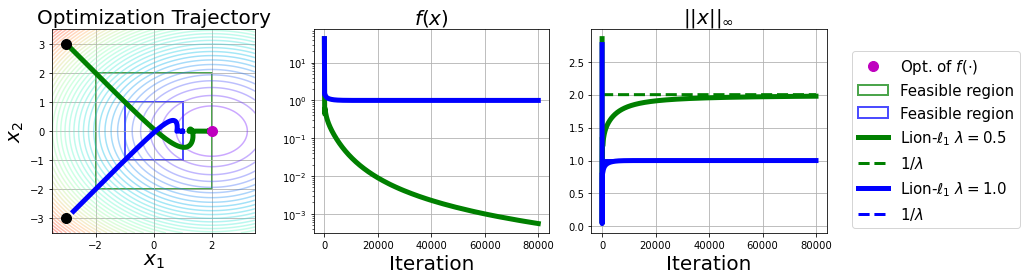

In [56]:

%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import autograd.numpy as np
from autograd import grad
from math import pi

eps = .0000001

def loss_fn(theta):
    x, y = theta
    return (x - 2)**2 + y**2/.5 #5

gradient_fn = grad(loss_fn)

theta0_1 = np.array([-3., 3])
theta0_2 = np.array([-3., -3])

optimal = np.array([2., 0.])
optimal_ = np.array([1.4, 0.])
alpha =0.06

fig, axs = plt.subplots(1, 3, figsize=(3*4, 4))


T = 80000
beta1 = 0.99
beta2 = 0.999


def traj(lmd = 1.5, theta0 = theta0_1, T = 600):
    trajectory_simple = []
    losses_simple = []
    phi_sample = []

    theta_simple = theta0
    m = np.array([0.0, 0.0])
    v = np.array([0.0, 0.0])
    for t in range(1, T): # theta_simple is for Lion
        losses_simple.append(loss_fn(theta_simple) + eps * np.sum(np.abs(theta_simple)))
        grad = gradient_fn(theta_simple)

        m = (1-beta1) * grad + beta1 * m
        v = (1-beta2) * grad**2 + beta2 * v
        
        d = (m / (1 - beta1**t)) / (np.sqrt(v / (1 - beta2**t)) + eps)
        theta_simple = theta_simple - alpha*(d + lmd * theta_simple)

        if t > T - 5:
            print(d, theta_simple)


        trajectory_simple.append(theta_simple)
        phi_sample.append(np.max(np.abs(theta_simple)))

    trajectory_simple = np.array(trajectory_simple)
    losses_simple = np.array(losses_simple)
    phi_sample = np.array(phi_sample)
    return trajectory_simple, losses_simple, phi_sample

lmd_1 = .5
lmd_2 = 1.0
trajectory_simple, losses_simple, phi_sample = traj(lmd = lmd_1, theta0=theta0_1, T = T)
trajectory_simple_2, losses_simple_2, phi_sample_2 = traj(lmd = lmd_2, theta0=theta0_2, T = T)



fontsize = 20
x = np.linspace(-3.5, 3.5, 100)
y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(x, y)
Z = loss_fn(np.array([X, Y]))

axs[0].contour(X, Y, Z, levels=50, cmap='rainbow', alpha=0.37)

axs[0].plot(trajectory_simple[:, 0], trajectory_simple[:, 1], 'g-', markersize=5,linewidth=5)
axs[0].plot(trajectory_simple_2[:, 0], trajectory_simple_2[:, 1], 'b-', markersize=5,linewidth=5)
# plot the optimal point
axs[0].plot(optimal[0], optimal[1], 'mo', markersize=10, label = 'Opt. of $f(\cdot)$', alpha = 1.)

# plot initial point
axs[0].plot(theta0_1[0], theta0_1[1], 'ko', markersize=10)
axs[0].plot(theta0_2[0], theta0_2[1], 'ko', markersize=10)

limt = (1-beta1) / np.sqrt(1-beta2) / np.sqrt(1-beta1**2/beta2)
print(limt)
w = h = 2 / lmd_1 
rectangle = patches.Rectangle((-w/2, -h/2), w, h, facecolor='none',edgecolor='g', alpha = 0.7, label='Feasible region', linewidth  = 2) # centered at (0,0)
axs[0].add_patch(rectangle)

w = h = 2 / lmd_2
rectangle = patches.Rectangle((-w/2, -h/2), w, h, facecolor='none',edgecolor='b', alpha = 0.7, label='Feasible region',  linewidth  = 2) # centered at (0,0)
axs[0].add_patch(rectangle)

axs[0].set_aspect('equal', 'box')

axs[0].set_xlabel('$x_1$', fontsize=fontsize, labelpad=1)
axs[0].set_ylabel('$x_2$',fontsize=fontsize)
axs[0].set_title(f'Optimization Trajectory', fontsize=fontsize)


axs[0].grid(True)
# axs[0].legend(fontsize=18)

axs[1].plot(losses_simple, c='g', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_1}$', linestyle='-', linewidth=5)
axs[1].plot(losses_simple, c='g', label = f'$1/\lambda$', linestyle='--', linewidth=3)
axs[1].plot(losses_simple_2, c='b', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_2}$', linestyle='-', linewidth=5)
axs[1].plot(losses_simple_2, c='b', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[1].set_xlabel('Iteration', fontsize=fontsize)
axs[1].grid(True)
# axs[1].legend(fontsize=fontsize)
axs[1].set_yscale('log')
axs[1].set_title(f'$f(x)$', fontsize=fontsize)


axs[2].plot(phi_sample, c='g', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_1}$', linestyle='-', linewidth=5)
axs[2].plot(np.ones_like(phi_sample)*(1 / lmd_1), c='g', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[2].plot(phi_sample_2, c='b', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_2}$', linestyle='-', linewidth=5)
axs[2].plot(np.ones_like(phi_sample_2)*(1 / lmd_2), c='b', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[2].set_xlabel('Iteration', fontsize=fontsize)
#axs[2].legend(fontsize=18)
axs[2].grid(True)
axs[2].set_title(f'$||x||_\infty$', fontsize=fontsize)
# axs[2].set_yscale('log')

# For the third subplot
# Collect handles and labels from each subplot
handles, labels = [], []
for ax in axs[:-1]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

# Create a single combined legend for the figure
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

interval = T / 4
x_ticks = np.arange(5) * interval
for i, ax in enumerate(axs):
    if i <= 3 and i > 1 :  # This will apply the change to only the first three subplots
        ax.set_xticks(x_ticks)

plt.tight_layout()
plt.show()
# plt.savefig('max_toy.pdf', bbox_inches='tight')

In [53]:
lmd = .1
eps = 0.000001
a = 2 * lmd
b = -(2 + 4 * lmd + lmd * eps)
c = 4

D = b**2 - 4 * a * c

x = (-b - D**0.5)/(2*a)
x

1.9999998750000103

[-1.  1.]
[-0.99636309  0.99955544]
[-0.98908984  0.99879402]
[-0.97691405  0.99769985]
[-0.95823362  0.99625664]
[-0.93112227  0.99444778]
[-0.89344732  0.99225641]
[-0.84315967  0.98966551]
[-0.77878996  0.98665796]
[-0.70007491  0.98321671]
[-0.60847022  0.97932482]
[-0.50721689  0.97496569]
[-0.40078865  0.97012313]
[-0.29391854  0.96478156]
[-0.19066236  0.95892621]
[-0.09386658  0.95254325]
[-0.00510311  0.94562002]
[0.07509442 0.93814526]
[0.14689667 0.93010924]
[0.21087804 0.92150403]
[0.26779774 0.9123237 ]
[0.31846138 0.90256446]
[0.36364355 0.8922249 ]
[0.40405046 0.88130612]
[0.44030647 0.8698119 ]
[0.47295369 0.85774876]
[0.5024579 0.8451261]
[0.5292171  0.83195623]
[0.55357058 0.81825435]
[0.57580753 0.80403855]
[0.59617473 0.78932974]
[0.61488325 0.77415151]
[0.63211413 0.75853   ]
[0.64802314 0.74249367]
[0.66274479 0.72607312]
[0.67639566 0.7093008 ]
[0.68907715 0.69221074]
[0.7008778  0.67483824]
[0.7118752  0.65721957]
[0.72213758 0.63939162]
[0.73172521 0.62139163]


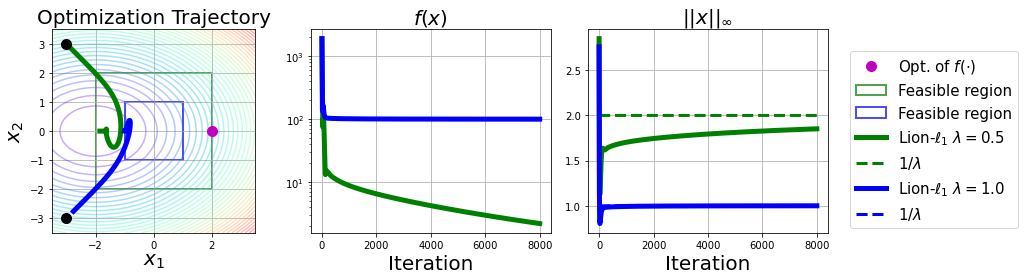

In [57]:

%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import autograd.numpy as np
from autograd import grad
from math import pi

eps = .0000001

def loss_fn(theta):
    x, y = theta
    return 100* ((x + 2)**2 + y**2/.5) #5

gradient_fn = grad(loss_fn)

theta0_1 = np.array([-3., 3])
theta0_2 = np.array([-3., -3])

optimal = np.array([2., 0.])
optimal_ = np.array([1.4, 0.])
alpha =0.06

fig, axs = plt.subplots(1, 3, figsize=(3*4, 4))


T = 8000
beta1 = 0.99
beta2 = 0.999


def traj(lmd = 1.5, theta0 = theta0_1, T = 600):
    trajectory_simple = []
    losses_simple = []
    phi_sample = []

    theta_simple = theta0
    m = np.array([0.0, 0.0])
    v = np.array([0.0, 0.0])
    for t in range(1, T): # theta_simple is for Lion
        losses_simple.append(loss_fn(theta_simple) + eps * np.sum(np.abs(theta_simple)))
        grad = gradient_fn(theta_simple)

        m = (1-beta1) * grad + beta1 * m
        v = (1-beta2) * grad**2 + beta2 * v
        
        d = (m / (1 - beta1**t)) / (np.sqrt(v / (1 - beta2**t)) + eps)
        theta_simple = theta_simple - alpha*(d + lmd * theta_simple)

        if t < 1000:
            print(d)


        trajectory_simple.append(theta_simple)
        phi_sample.append(np.max(np.abs(theta_simple)))

    trajectory_simple = np.array(trajectory_simple)
    losses_simple = np.array(losses_simple)
    phi_sample = np.array(phi_sample)
    return trajectory_simple, losses_simple, phi_sample

lmd_1 = .5
lmd_2 = 1.0
trajectory_simple, losses_simple, phi_sample = traj(lmd = lmd_1, theta0=theta0_1, T = T)
trajectory_simple_2, losses_simple_2, phi_sample_2 = traj(lmd = lmd_2, theta0=theta0_2, T = T)



fontsize = 20
x = np.linspace(-3.5, 3.5, 100)
y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(x, y)
Z = loss_fn(np.array([X, Y]))

axs[0].contour(X, Y, Z, levels=50, cmap='rainbow', alpha=0.37)

axs[0].plot(trajectory_simple[:, 0], trajectory_simple[:, 1], 'g-', markersize=5,linewidth=5)
axs[0].plot(trajectory_simple_2[:, 0], trajectory_simple_2[:, 1], 'b-', markersize=5,linewidth=5)
# plot the optimal point
axs[0].plot(optimal[0], optimal[1], 'mo', markersize=10, label = 'Opt. of $f(\cdot)$', alpha = 1.)

# plot initial point
axs[0].plot(theta0_1[0], theta0_1[1], 'ko', markersize=10)
axs[0].plot(theta0_2[0], theta0_2[1], 'ko', markersize=10)

limt = (1-beta1) / np.sqrt(1-beta2) / np.sqrt(1-beta1**2/beta2)
print(limt)
w = h = 2 / lmd_1 
rectangle = patches.Rectangle((-w/2, -h/2), w, h, facecolor='none',edgecolor='g', alpha = 0.7, label='Feasible region', linewidth  = 2) # centered at (0,0)
axs[0].add_patch(rectangle)

w = h = 2 / lmd_2
rectangle = patches.Rectangle((-w/2, -h/2), w, h, facecolor='none',edgecolor='b', alpha = 0.7, label='Feasible region',  linewidth  = 2) # centered at (0,0)
axs[0].add_patch(rectangle)

axs[0].set_aspect('equal', 'box')

axs[0].set_xlabel('$x_1$', fontsize=fontsize, labelpad=1)
axs[0].set_ylabel('$x_2$',fontsize=fontsize)
axs[0].set_title(f'Optimization Trajectory', fontsize=fontsize)


axs[0].grid(True)
# axs[0].legend(fontsize=18)

axs[1].plot(losses_simple, c='g', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_1}$', linestyle='-', linewidth=5)
axs[1].plot(losses_simple, c='g', label = f'$1/\lambda$', linestyle='--', linewidth=3)
axs[1].plot(losses_simple_2, c='b', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_2}$', linestyle='-', linewidth=5)
axs[1].plot(losses_simple_2, c='b', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[1].set_xlabel('Iteration', fontsize=fontsize)
axs[1].grid(True)
# axs[1].legend(fontsize=fontsize)
axs[1].set_yscale('log')
axs[1].set_title(f'$f(x)$', fontsize=fontsize)


axs[2].plot(phi_sample, c='g', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_1}$', linestyle='-', linewidth=5)
axs[2].plot(np.ones_like(phi_sample)*(1 / lmd_1), c='g', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[2].plot(phi_sample_2, c='b', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_2}$', linestyle='-', linewidth=5)
axs[2].plot(np.ones_like(phi_sample_2)*(1 / lmd_2), c='b', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[2].set_xlabel('Iteration', fontsize=fontsize)
#axs[2].legend(fontsize=18)
axs[2].grid(True)
axs[2].set_title(f'$||x||_\infty$', fontsize=fontsize)
# axs[2].set_yscale('log')

# For the third subplot
# Collect handles and labels from each subplot
handles, labels = [], []
for ax in axs[:-1]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

# Create a single combined legend for the figure
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

interval = T / 4
x_ticks = np.arange(5) * interval
for i, ax in enumerate(axs):
    if i <= 3 and i > 1 :  # This will apply the change to only the first three subplots
        ax.set_xticks(x_ticks)

plt.tight_layout()
plt.show()
# plt.savefig('max_toy.pdf', bbox_inches='tight')

In [55]:
interval = T / 4
x_ticks = np.arange(5) * interval
x_ticks

array([   0., 2000., 4000., 6000., 8000.])

In [ ]:
+